# Description of the Project:

    I used KModes for clustering in this project. KModes algorithm is for categorical data. In this dataset has 21 columns and there are many more cateorical columns like job, marital, education, housing. So, I cannot use KMeans algorithm for this data. The dataset has 41188 entries. You can see the results below. Have a good read :)

# Import the Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Import the dataset

In [63]:
data = pd.read_csv('bankmarketing.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
data.shape

(41188, 21)

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Pick up the Categorical Columns for Analysis

In [64]:
data_clust = data[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

### Transform the Age column from numeric to categorical data

In [65]:
data_clust['age_bin'] = pd.cut(data_clust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
data_clust  = data_clust.drop('age',axis = 1)

C:\Users\Lenovo Pc\AppData\Local\Temp\ipykernel_16096\294582590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clust['age_bin'] = pd.cut(data_clust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],


In [43]:
data_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


### Data Preprocessing

Transform the data cloumns which has string and categorical values to the numeric values.

In [66]:
le = LabelEncoder()
data_clust = data_clust.apply(le.fit_transform)
data_clust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


### Using K-Mode with "Cao" initialization

In [53]:
km_cao = KModes(init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data_clust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3572, cost: 164303.0
Run 1, iteration: 2/100, moves: 439, cost: 164303.0


In [54]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data_clust.columns

In [60]:
clusterCentroidsDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,7,1,3,1,0,0,0,6,0,1,3
1,0,1,3,0,2,0,1,6,3,1,2
2,1,1,0,1,2,0,1,4,2,1,2
3,9,1,6,0,2,0,0,1,1,1,2
4,1,2,2,0,0,0,0,6,0,1,2


### Interpretation of the Cluster Analysis:

The data has 5 different cluster. Those clusters differ according to the job, marital, education, default, contact, month, day of week and age. But I am not sure these clusters are good fit my data. To determine that I should use 'Elbow Method'.

### Using K-Mode with "Huang" initialization

In [67]:
km_huang = KModes(init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data_clust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8073, cost: 167540.0


In [68]:
clusterCentroidsDf2 = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf2.columns = data_clust.columns

In [62]:
clusterCentroidsDf2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,7,1,3,1,0,0,0,6,0,1,3
1,0,1,3,0,2,0,1,6,3,1,2
2,1,1,0,1,2,0,1,4,2,1,2
3,9,1,6,0,2,0,0,1,1,1,2
4,1,2,2,0,0,0,0,6,0,1,2


### Interpretation of the Results:

It is the same as Cao initialization method results. Clusters do not differ according to the poutcome and loan.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 216952.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11385, cost: 194074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7987, cost: 198737.0
Init: initializing centroids
Init: initializing clusters
Star

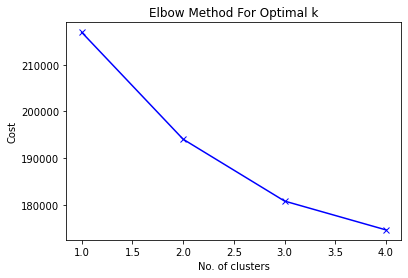

In [69]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_clust)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data_clust)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8820, cost: 193732.0
Run 1, iteration: 2/100, moves: 6840, cost: 193732.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6676, cost: 195147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5632, cost: 198109.0
Run 3, iteration: 2/100, moves: 5463, cost: 198109.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6199, cost: 200742.0
Run 4, iteration: 2/100, moves: 8, cost: 200742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7403, cost: 197948.0
Best run was number 1


array([1, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [72]:
data_clust['cluster_id'] = clusters
data_clust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_id
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,1
4,7,1,3,0,0,2,1,6,1,1,4,1


In [75]:
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [76]:
combinedDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster_id,cluster_predicted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1


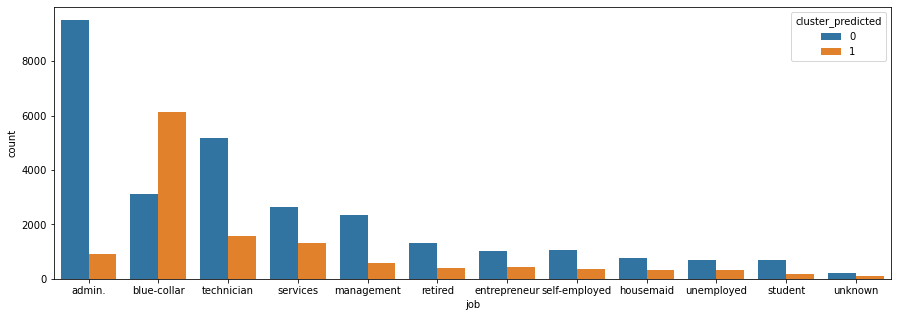

In [77]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

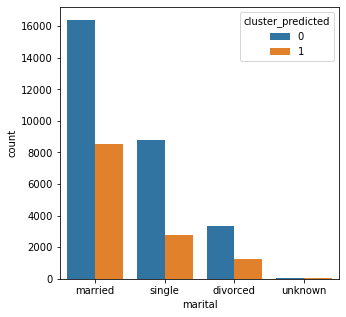

In [78]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

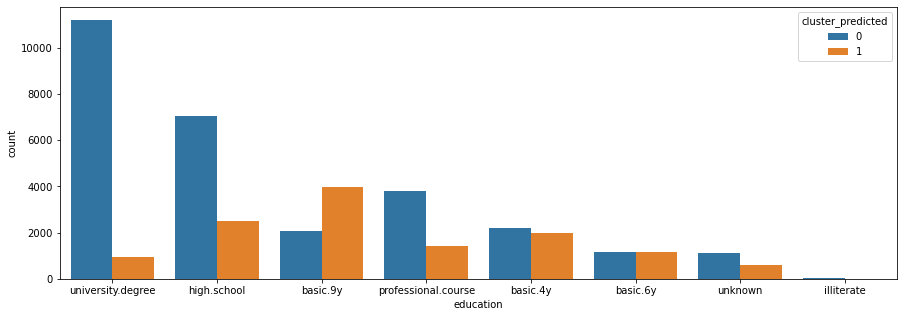

In [79]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

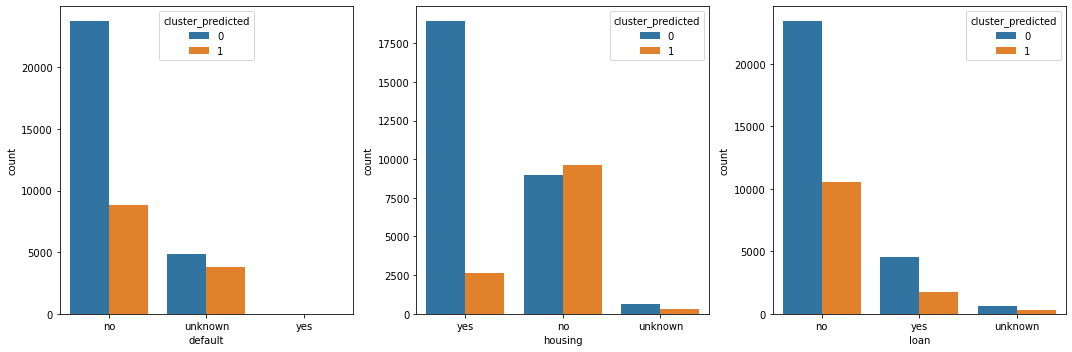

In [80]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

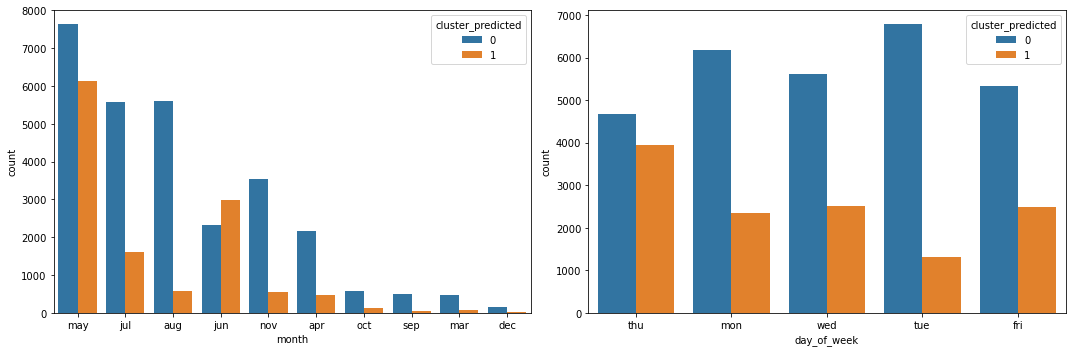

In [81]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [83]:
combinedDf['age_bin'] = pd.cut(combinedDf['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
combinedDf  = combinedDf.drop('age',axis = 1)

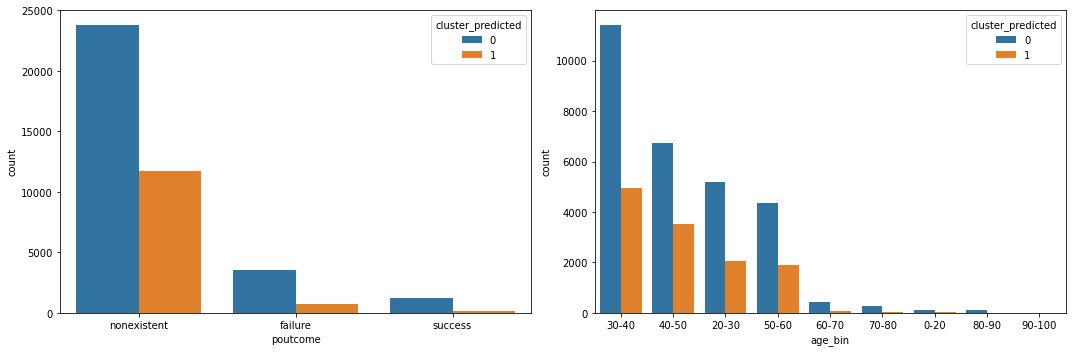

In [84]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

### Evaluate the Clusters:


As a result of the analysis, cluster 1 is married, admin and graduated from university. And also this class has housing loan, they are between the 30 and 40 years old. The last contact with this cluster on tuesday.

Cluster 2 is married, bluecollar and graduated from basic 9 years school. And also, this class has not housing loan, the same as cluster 1 their ages are between 30 and 40. The last contact with this cluster on thursday.